Mais informações sobre o dataset: https://keras.io/datasets/

In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32), None)

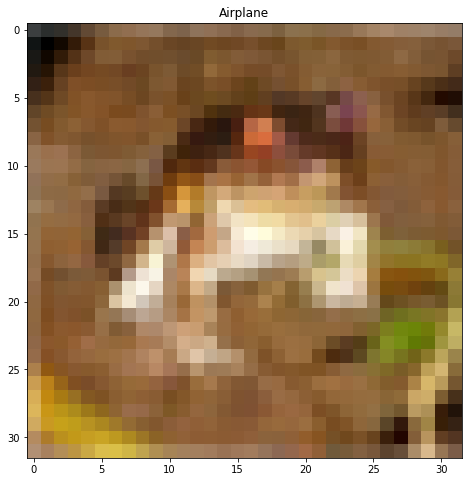

In [13]:
y_train[0], plot_image(0)

In [0]:
dict = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}
def plot_image(number):
    fig = plt.figure(figsize = (15,8))
    plt.imshow(x_train[number])
    plt.title(dict[y_train[number][0]])

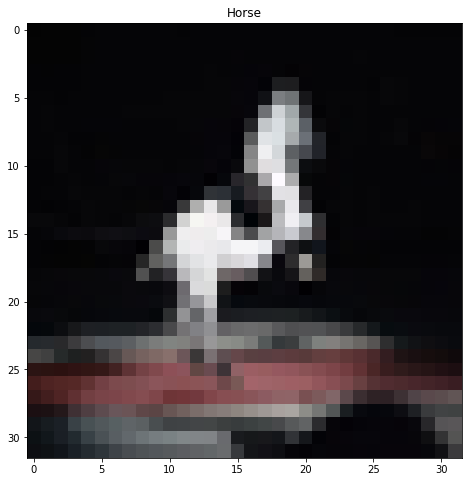

In [28]:
plot_image(321)

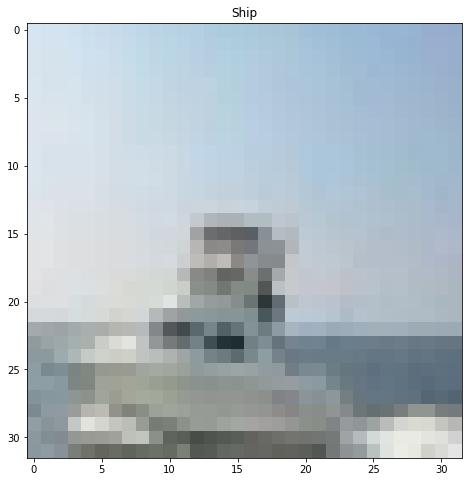

In [0]:
plot_image(100)

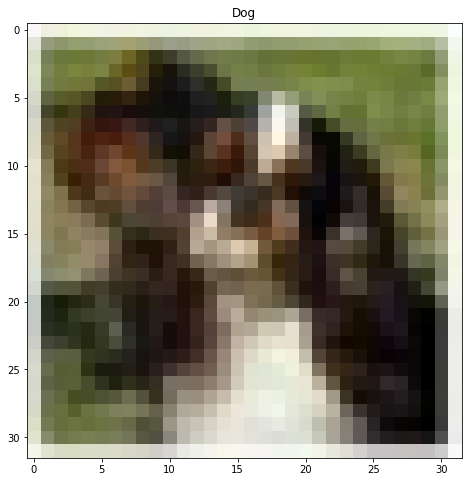

In [0]:
plot_image(500)

In [0]:
batch_size = 32
num_classes = 10
epochs = 10

In [30]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## First Model - Simple

In [0]:
model = Sequential()
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test))

W0730 00:15:03.383301 140207082805120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0730 00:15:03.444988 140207082805120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 102us/step - loss: 14.5076 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 4s 84us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 4s 84us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14

In [0]:
predictions_train = model.predict(x_train)
predictions_test = model.predict(x_test)

In [36]:
predictions_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [37]:
scores = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 0s 41us/step


In [38]:
print('Test accuracy:', scores[1])

Test accuracy: 0.1


## Complex Model

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
Conv2D(32, (3, 3)) = 32 neuronios

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=1,
              validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 269s 5ms/step - loss: 14.5009 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000


In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 12s 1ms/step


In [0]:
print('Test accuracy:', scores[1])

Test accuracy: 0.5474
